### Amyotrophic lateral sclerosis (ALS)

**About Dataset**

Voice database was collected in Republican Research and Clinical Center of Neurology and Neurosurgery (Minsk, Belarus). It consists of 128 sustained vowel phonations (64 of vowel /a/ and 64 of vowel /i/) from 64 speakers, 31 of which were diagnosed with ALS. Each speaker was asked to produce sustained phonation of vowels /a/ and /i/ at a comfortable pitch and loudness as constant and long as possible. It can be seen that voice database is almost balanced and contains 48% of pathological voices and 52% of healthy voices.

The age of the 17 male patients ranges from 40 to 69 (mean 61.1 ± 7.7) and the age of the 14 female patients ranges from 39 to 70 (mean 57.3 ± 7.8). For the case of healthy controls (HC), the age of the 13 men ranges from 34 to 80 (mean 50.2 ± 13.8) and the age of the 20 females ranges from 37 to 68 (mean 56.1 ± 9.7). The samples were recorded at 44.1 kHz using different smartphones with a regular headsets and stored as 16 bit uncompressed PCM files. Average duration of the records in the HC group was 3.7 ± 1.5 s, and in ALS group 4.1 ± 2.0 s. The detailed information about ALS patients is presented in the article

**data source link:**
https://www.kaggle.com/datasets/daniilkrasnoproshin/amyotrophic-lateral-sclerosis-als?select=Minsk2020_ALS_dataset.csv

In [4]:
#importing of main libriries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')

In [5]:
# import the main and usefull libraris
from sklearn import tree
from sklearn.svm import SVC
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import  Pipeline
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold,StratifiedKFold,LeaveOneOut,ShuffleSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score,classification_report
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.feature_selection import SelectKBest,f_classif

In [6]:
# import the data set
df = pd.read_csv('Minsk2020_ALS_dataset.csv')

In [7]:
#first five rows of data 
df.head()

ID Sex  Age      J1_a      J3_a      J5_a     J55_a      S1_a      S3_a  \
0   8   M   58  0.321817  0.141230  0.199128  0.923634  6.044559  3.196477   
1  20   F   57  0.344026  0.177032  0.206458  0.827714  1.967728  0.856639   
2  21   F   58  0.264740  0.148228  0.177078  0.532566  1.850893  0.942743   
3  22   F   70  0.455793  0.174870  0.243660  0.962641  2.883768  1.284926   
4  24   M   66  0.269335  0.143961  0.167465  0.547745  2.327924  1.164109   

       S5_a  ...   dCCi(7)   dCCi(8)   dCCi(9)  dCCi(10)  dCCi(11)  dCCi(12)  \
0  3.770575  ... -0.024467 -0.005300  0.051874 -0.037710 -0.026549 -0.021149   
1  1.179851  ...  0.002485 -0.004535 -0.000225 -0.006977 -0.012510  0.014773   
2  1.071950  ... -0.013927  0.007908  0.007960 -0.009022 -0.012488 -0.015588   
3  1.915058  ... -0.019285 -0.021768  0.020495  0.035976 -0.034648  0.008021   
4  1.420891  ... -0.005743  0.004726 -0.015247  0.003900 -0.007686 -0.003784   

        d_1         F2_i   F2_{conv}  Diagnosis (ALS)  
0  4.825476  2526.285657  833.498083                1  
1  5.729322  1985.712014  561.802625                1  
2  8.258488  2364.695972  796.723440                1  
3  5.447137  1860.172768  359.409974                1  
4  8.562517  2051.627447  817.111847                1  

[5 rows x 135 columns]

In [8]:
# last five rows of  data
df.tail()

ID Sex  Age      J1_a      J3_a      J5_a     J55_a       S1_a      S3_a  \
59  123   M   43  0.255799  0.123679  0.182658  0.505591   6.222031  2.876602   
60  125   M   63  0.513175  0.296489  0.334845  0.729804   9.686563  4.327943   
61  127   F   67  0.383901  0.245923  0.251359  0.415136   4.148414  2.069757   
62  129   F   68  1.336216  0.815757  0.733197  0.981928  11.224542  5.295879   
63  131   F   60  0.916706  0.566121  0.512857  1.467165   6.372832  3.251168   

        S5_a  ...   dCCi(7)   dCCi(8)   dCCi(9)  dCCi(10)  dCCi(11)  dCCi(12)  \
59  3.894294  ...  0.220533  0.089766 -0.120838 -0.004221 -0.013165  0.004642   
60  5.687977  ...  0.028016 -0.038739  0.011588 -0.011281 -0.004294  0.011239   
61  2.527213  ...  0.011685  0.007883 -0.014839  0.013859  0.011145  0.001418   
62  6.994751  ...  0.015712  0.013437  0.025113  0.008852 -0.010132 -0.008458   
63  3.539229  ... -0.046235  0.041946 -0.065313 -0.016682  0.061026 -0.005883   

          d_1         F2_i    F2_{conv}  Diagnosis (ALS)  
59   9.855665  3128.341308  1990.937097                0  
60  11.094558  1964.218942   601.076046                0  
61  12.564742  2526.285657   934.343638                0  
62  10.670669  3201.250289  2284.051658                0  
63   6.972152  2792.655884  1518.529172                0  

[5 rows x 135 columns]

**EDA**
* get informtion of the datatypes
* if there is any class data in the features,convert them into binary from 
* Look how ages of the data are looking and get some information
* get the descriptive statistics of the above data
* construct histogram, boxplot for every column using For loop
* get the correlation heatmap and find if there is association between certain columns
* choose the specific columns which have certain association and get the pairplot

In [10]:
# information of data and data types (using for loop)
for i  in df.columns:
    print(f"'{i}'  data type: {df[i].dtypes}")

'ID'  data type: int64
'Sex'  data type: object
'Age'  data type: int64
'J1_a'  data type: float64
'J3_a'  data type: float64
'J5_a'  data type: float64
'J55_a'  data type: float64
'S1_a'  data type: float64
'S3_a'  data type: float64
'S5_a'  data type: float64
'S11_a'  data type: float64
'S55_a'  data type: float64
'DPF_a'  data type: float64
'PFR_a'  data type: float64
'PPE_a'  data type: float64
'PVI_a'  data type: float64
'HNR_a'  data type: float64
'GNEa_{\mu}'  data type: float64
'GNEa_{\sigma}'  data type: float64
'Ha(1)_{mu}'  data type: float64
'Ha(2)_{mu}'  data type: float64
'Ha(3)_{mu}'  data type: float64
'Ha(4)_{mu}'  data type: float64
'Ha(5)_{mu}'  data type: float64
'Ha(6)_{mu}'  data type: float64
'Ha(7)_{mu}'  data type: float64
'Ha(8)_{mu}'  data type: float64
'Ha(1)_{sd}'  data type: float64
'Ha(2)_{sd}'  data type: float64
'Ha(3)_{sd}'  data type: float64
'Ha(4)_{sd}'  data type: float64
'Ha(5)_{sd}'  data type: float64
'Ha(6)_{sd}'  data type: float64
'Ha(7)_{sd}

In [11]:
del df['ID']

In [12]:
#find out the data shape (how many columns and how many rows are there)
df.shape

(64, 134)

In [13]:
#describe of data  Like count, Mean, Std, Min, quantile(25%,50%,75%), Max
df.describe().T

count         mean         std         min          25%  \
Age               64.0    56.390625   10.203668   34.000000    50.750000   
J1_a              64.0     0.658951    0.724002    0.098881     0.325932   
J3_a              64.0     0.379242    0.435636    0.065791     0.172422   
J5_a              64.0     0.395886    0.431926    0.092655     0.198274   
J55_a             64.0     0.945496    0.791558    0.285497     0.538387   
...                ...          ...         ...         ...          ...   
dCCi(12)          64.0     0.001269    0.020800   -0.083977    -0.006534   
d_1               64.0     9.164473    2.681449    2.276702     7.604734   
F2_i              64.0  2495.116475  617.755856  444.730268  2051.627447   
F2_{conv}         64.0  1209.976405  553.694046   48.246203   800.181156   
Diagnosis (ALS)   64.0     0.484375    0.503706    0.000000     0.000000   

                         50%          75%          max  
Age                58.000000    63.250000    80.000000  
J1_a                0.458935     0.772783     5.391649  
J3_a                0.253976     0.465699     3.217293  
J5_a                0.293405     0.476541     3.321567  
J55_a               0.698183     1.189025     5.991336  
...                      ...          ...          ...  
dCCi(12)            0.000661     0.009515     0.077897  
d_1                 9.646564    10.757522    15.420777  
F2_i             2471.097222  2938.236560  3599.554394  
F2_{conv}        1206.596083  1551.677678  2441.219054  
Diagnosis (ALS)     0.000000     1.000000     1.000000  

[133 rows x 8 columns]

In [14]:
# Convert 'Male' to 0, 'Female' to 1 or another option is one hot encoding 

df["Sex"] =df['Sex'].replace({'M': 0, 'F': 1})

In [15]:
# sum of null values
[features for features in df.columns if df[features].isnull().sum()>0]

[]

In [16]:
#def grouper(df, idx, col):
 #   if 20 <=  df[col].loc[idx] <= 40:
     #   return '20-40'
  #  elif 40 <= df[col].loc[idx] <= 60:
    #    return '40-60'
   # elif 60 <= df[col].loc[idx] <= 80:
    #    return '60-80'


In [17]:
# Define the grouper function
def grouper(df, idx, col):
    age = df[col].loc[idx]
    if 20 <= age < 40:
        return '20-40'
    elif 40 <= age < 60:
        return '40-60'
    elif 60 <= age < 80:
        return '60-80'
    else:
        return 'Other'

This code defines a custom function called `grouper` that takes three arguments: `df` (a DataFrame), `idx` (an index or value), and `col` (a column name).

The function uses the value from the specified column (`col`) at the specified index (`idx`) to determine which age range it belongs to, and returns a string indicating the age range.

The age ranges are defined as:

* '20-40' if the age is between 20 and 40 (inclusive)
* '40-60' if the age is between 40 and 60 (inclusive)
* '60-80' if the age is between 60 and 80 (inclusive)
* 'Other' for all other ages

This custom function can then be used with the `groupby` method to group data by these age ranges.

In [19]:

# Group by age range and count for Male
Male = df.Age[df.Sex == '0'].groupby(lambda x: grouper(df, x, 'Age')).count()

# Group by age range and count for Female
Female = df.Age[df.Sex == '1'].groupby(lambda x: grouper(df, x, 'Age')).count()



1. `df.Sex == '0'` filters out rows where 'Sex' is not '0'.
2. `df.Age[df.Sex == '0']` applies this filter to the 'Age' column.
3. `groupby(lambda x: grouper(df, x, 'Age'))` groups the filtered DataFrame by the custom `grouper` function, which takes three arguments: the DataFrame, an index, and the 'Age' column.
4. `.count()` counts the number of rows in each group.
5. The result is a Series with index equal to unique values in the 'Age' column and values equal to the count of rows in each group.

In [21]:
# Make sure both series have the same index
#all_categories = sorted(set(Male.index).union(set(Female.index)))
#Male = Male.reindex(all_categories, fill_value=0)
#Female = Female.reindex(all_categories, fill_value=0)


In [22]:
#Plotting
#xpos = np.arange(len(Female.index))

#plt.figure(figsize=(9, 5))
#plt.bar(xpos - 0.2, Male, width=0.2, label='Male')
#plt.bar(xpos, Female, width=0.2, label='Female')
#plt.xticks(xpos + 0.1, Female.index)
#plt.xlabel('Age Group')
#plt.ylabel('Count')
#plt.legend()
#plt.show()

In [23]:
#xpos = np.arange(len(Male.index))

#plt.figure(figsize=(9,5))
#plt.bar(xpos,Male,width=0.2,label = 'Male')
#plt.bar([x for x in 0.2+xpos],Female,width=0.2,label = 'Female')
#plt.xticks(xpos,Male.index)
#plt.legend()
#plt.show()

In [24]:
#asine the featuresand target variable
x= df.drop('Diagnosis (ALS)',axis = 1)
y= df['Diagnosis (ALS)']

In [25]:
# find the best 15 feature columns 
f_clsif = SelectKBest(f_classif,k=15)
f_clsif.fit(x,y)

SelectKBest(k=15)

**Feature Selection using SelectKBest and f_classif**

The code uses the `SelectKBest` class and `f_classif` function from `sklearn.feature_selection` to perform feature selection.

**Steps:**

1. Create an instance of `SelectKBest` with `f_classif` as the scorer and select the top 15 features.
2. Fit the `SelectKBest` object to the training data `x` and target variable `y`.
3. The `f_classif` function ranks features based on their strength of association with the target variable.
4. The resulting object `f_clsif` contains the selected features, which can be used for further analysis or modeling.

**Result:** The selected features can be used for further analysis or modeling.

In [27]:
f_clsif.scores_ # see best 15 columns score

array([1.51966036e+00, 4.81111518e+00, 3.72374464e+00, 2.80940566e+00,
       3.90272142e+00, 9.29424862e+00, 2.77970662e+00, 2.01078408e+00,
       3.04007079e+00, 4.53402558e+00, 2.83055323e+00, 1.78708514e-01,
       8.44003082e+00, 1.31234403e+01, 1.34691845e+01, 5.06556737e+00,
       7.26673419e+00, 2.37589532e+00, 1.41239019e-02, 6.77236381e-01,
       1.76272828e-01, 8.74198430e-01, 1.35243407e+00, 3.32816856e+00,
       7.10867752e+00, 7.82461970e+00, 2.33069569e+00, 2.94059917e+00,
       8.33835113e-01, 5.35734923e+00, 1.22983870e+00, 4.30339574e+00,
       7.71656069e+00, 4.65540447e+00, 5.47206862e+00, 1.12917647e+00,
       1.79560374e-01, 3.09671496e+00, 1.05684127e-01, 2.29953043e+00,
       1.05110077e+01, 6.42043481e+00, 1.97630163e+00, 1.87314320e+00,
       2.35278161e-01, 1.11248250e-01, 1.98683660e+00, 6.26361322e+00,
       1.21072262e+00, 3.34519979e+00, 3.32612120e-01, 2.59056141e+00,
       4.13056071e+00, 2.17872151e-02, 9.89016079e-03, 2.84651771e-02,
      

In [28]:
f_clsif.get_feature_names_out() # see the which column are best 15 columns

array(['J55_a', 'PFR_a', 'PPE_a', 'PVI_a', 'Ha(8)_{mu}', 'Ha(7)_{sd}',
       'Ha(7)_{rel}', 'PVI_i', 'HNR_i', 'Hi(8)_{sd}', 'Hi(1)_{rel}',
       'CCi(2)', 'CCi(6)', 'd_1', 'F2_{conv}'], dtype=object)

In [29]:
# create a variable asine the feature values
x= df[['Age', 'Sex', 'J55_a', 'PFR_a', 'PPE_a', 'PVI_a', 'Ha(8)_{mu}', 'Ha(7)_{sd}','Ha(7)_{rel}', 'PVI_i', 'HNR_i', 'Hi(8)_{sd}', 'Hi(1)_{rel}','CCi(2)', 'CCi(6)', 'd_1', 'F2_{conv}']]

In [30]:
x.head(20)

Age  Sex     J55_a     PFR_a     PPE_a     PVI_a  Ha(8)_{mu}  Ha(7)_{sd}  \
0    58    0  0.923634  0.261201  0.953932  0.497905  -32.988570    3.718647   
1    57    1  0.827714  0.214815  0.917383  0.496096  -38.601498    6.869505   
2    58    1  0.532566  0.250832  0.697039  0.484256  -30.253636    6.487032   
3    70    1  0.962641  0.394053  1.400853  0.710780  -22.283258    2.293785   
4    66    0  0.547745  0.280716  0.604214  0.464793  -27.578969    3.365784   
5    51    0  0.505987  0.184189  0.630030  0.258841  -31.279294    2.724680   
6    57    0  0.765986  0.283794  1.390729  0.469168  -38.652722    6.161217   
7    58    0  1.205596  0.364785  2.034901  0.780017  -24.551761    5.529329   
8    67    0  1.951256  0.265532  1.450424  0.576613  -29.173665    3.654008   
9    61    0  0.591160  0.120943  0.912168  0.330002  -30.162942    4.460441   
10   67    0  1.889785  0.366062  2.020179  1.696469  -40.625713   10.546459   
11   67    0  1.304613  0.175029  1.802719  0.632997  -39.988576    9.099600   
12   50    1  0.454599  0.142044  0.355592  0.209852  -60.830922    3.480109   
13   63    1  1.813700  0.296273  2.143594  1.441035  -25.271617    2.894641   
14   62    1  1.362995  0.204320  1.806991  0.859439  -12.270083    5.573836   
15   61    0  1.542224  0.366096  1.498665  0.705755  -32.126539    5.752471   
16   58    0  5.991336  2.059883  3.393774  3.152778  -54.128866   20.883980   
17   57    0  0.849025  0.113289  1.270080  0.491037  -35.894642    3.474426   
18   57    0  0.885479  0.168550  1.021275  0.542347  -32.017422    3.248811   
19   40    0  0.957065  0.166342  1.445147  0.842695  -30.476837    2.687244   

    Ha(7)_{rel}     PVI_i      HNR_i  Hi(8)_{sd}  Hi(1)_{rel}     CCi(2)  \
0      0.031975  0.548737   6.831568    7.702146     0.029578   5.290671   
1      0.024816  0.753773  19.656301    5.214603     0.084514   8.013684   
2      0.042494  0.513454  26.247032    1.973133     0.190498   5.398531   
3      0.056093  0.531370  14.497427    2.452554     0.044136  -2.032011   
4      0.048372  0.418242  24.602762    5.378356     0.174282  12.596246   
5      0.030564  0.283531  19.670345    4.352394     0.050627  14.725795   
6      0.025839  0.471937  19.579729    5.490719     0.120715  15.453971   
7      0.058102  0.912703  14.444541    6.353730     0.055619  15.284422   
8      0.044167  0.556261  16.074488    3.338447     0.053069   4.219037   
9      0.029744  0.258268  19.190522    5.583344     0.071087   4.056457   
10     0.021517  1.272719   8.934965    6.988977     0.103499  -0.569087   
11     0.023266  0.665707  19.334026   10.915085     0.099554  16.218545   
12     0.020255  0.223791  29.034071    5.511659     0.279002  12.274549   
13     0.037276  1.393756  11.798070    8.683996     0.049739   8.556412   
14     0.045952  1.333404  16.072877    5.995308     0.195044  20.597221   
15     0.025477  0.349088  22.958926    4.806596     0.367825  17.992741   
16     0.014896  0.258555  13.320835    5.751912     0.044208   1.368346   
17     0.034735  0.400185  14.512768    5.477708     0.141803  22.479055   
18     0.032800  0.309031  23.433559    5.230515     0.085109  20.074008   
19     0.044030  0.692408  17.079100    3.237483     0.174098  20.023235   

       CCi(6)        d_1    F2_{conv}  
0   -7.162548   4.825476   833.498083  
1    6.707502   5.729322   561.802625  
2  -15.978241   8.258488   796.723440  
3    7.383212   5.447137   359.409974  
4   -8.706192   8.562517   817.111847  
5   -3.615166   9.810520  1004.727725  
6   -4.737735   5.945219  1219.744513  
7    2.900285   8.422353   759.068477  
8   -9.566137   8.760510   669.022078  
9    1.257204   7.572111   838.978523  
10   8.932630   2.276702   669.461749  
11   1.186972  10.674106   481.009629  
12 -19.301494  10.950821  1553.425003  
13   8.327992   7.029500  1288.920905  
14 -12.995120  12.862700  1552.852150  
15   0.557423   7.148809   784.563460  
16   6.137819   8.008742   583.380671  
17   1

In [31]:
# cross check informtion on Sex Like Male and Females
pd.crosstab(x.Sex,y)

Diagnosis (ALS)   0   1
Sex                    
0                13  17
1                20  14

In [32]:
# cross check informtion on Sex And Ages
pd.crosstab(x.Age,x.Sex)

Sex  0  1
Age      
34   1  0
35   1  0
37   0  1
38   2  0
39   0  2
40   1  1
41   1  0
43   1  0
45   0  1
49   1  0
50   0  3
51   1  0
52   1  1
53   0  2
55   0  3
57   3  2
58   3  1
59   0  1
60   3  3
61   2  0
62   0  2
63   1  3
64   0  3
65   0  1
66   1  0
67   3  2
68   2  1
69   1  0
70   0  1
80   1  0

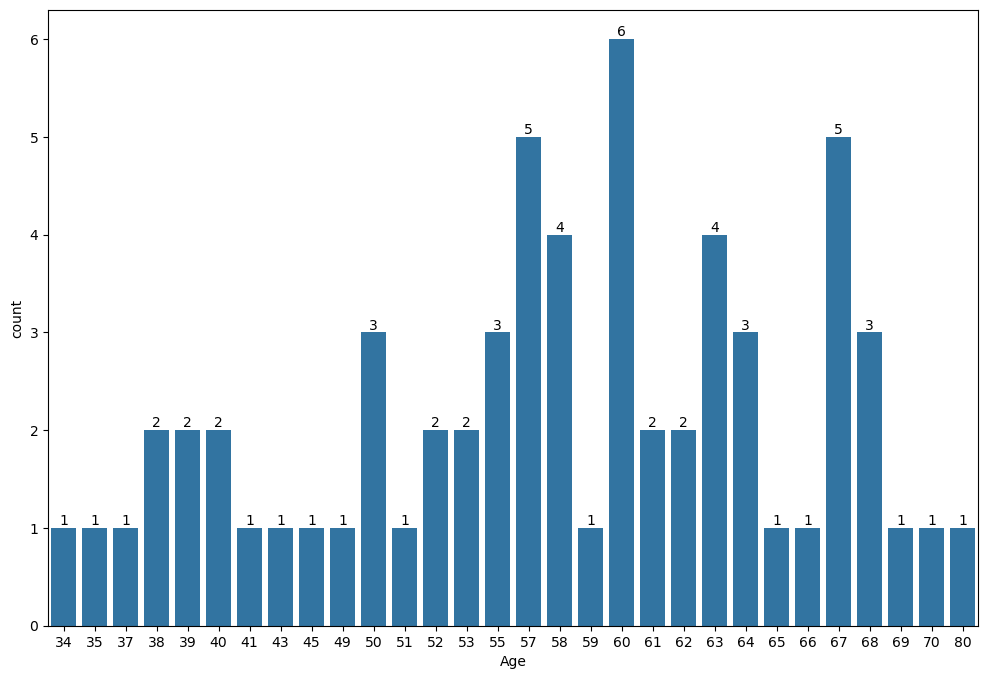

In [33]:
# We are seeing how many age people are there using on Countplot
plt.figure(figsize=(12,8))


age=sns.countplot(x='Age', data=x,)

for i in age.containers:
    age.bar_label(i)

**Iterates over each individual bar in the plot and adds a label to each bar, displaying the count value for each bar**

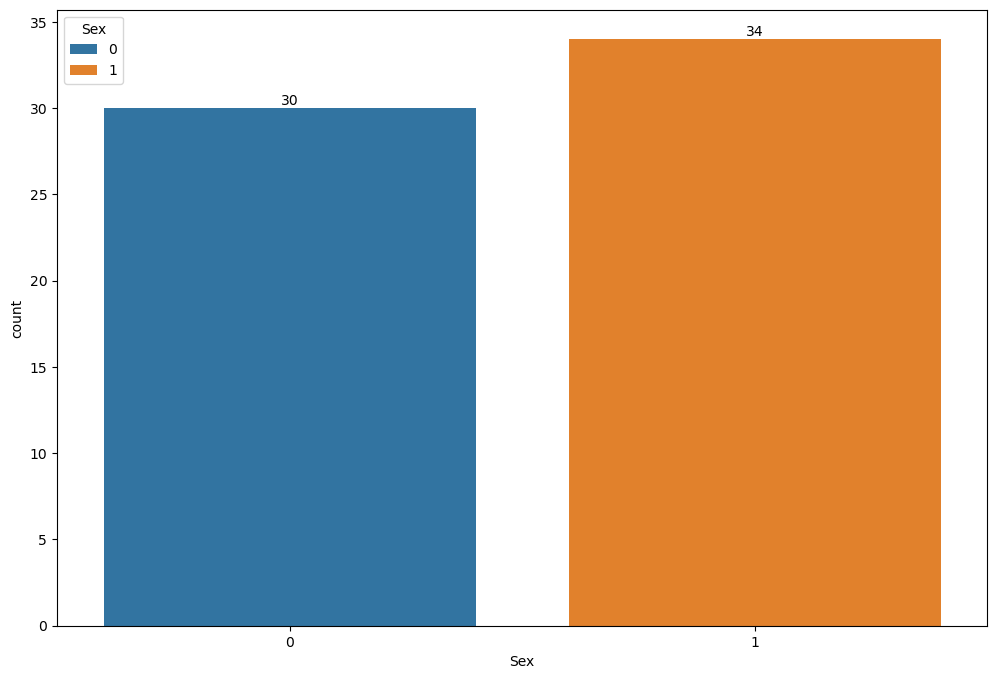

In [35]:
# We are seeing how many Genders people are there using on Countplot
plt.figure(figsize=(12,8))


Sex=sns.countplot(x='Sex', data=x,hue='Sex')

for i in Sex.containers:
    Sex.bar_label(i)
    


The text describes a code snippet that creates a stacked bar chart using the `seaborn` library. The chart displays the distribution of the 'Sex' column in a DataFrame `x`. The code:

1. Creates a count plot for the 'Sex' column with bars colored by the values in the 'Sex' column.
2. Iterates over the bars in the plot.
3. Labels each bar with its corresponding value.

The resulting plot shows two bars, one for each unique value in the 'Sex' column, with heights representing the count of observations for each sex.

**Histogram plots**

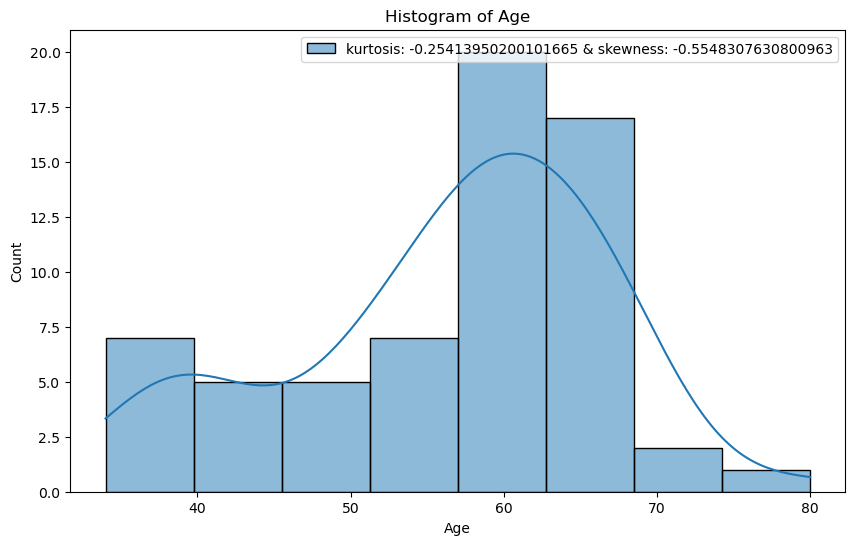

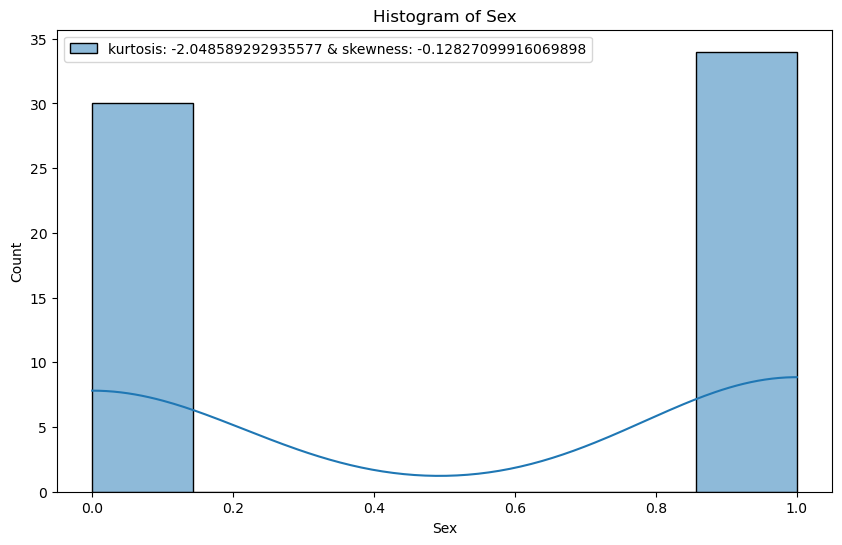

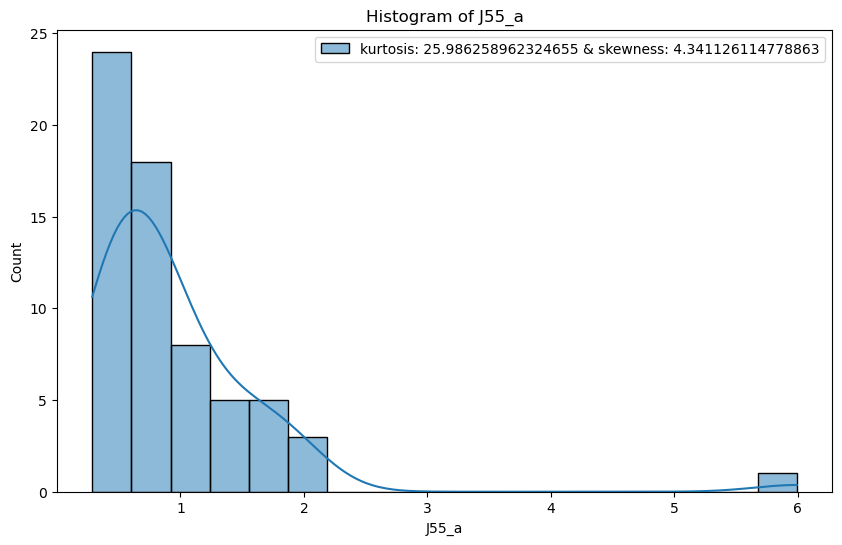

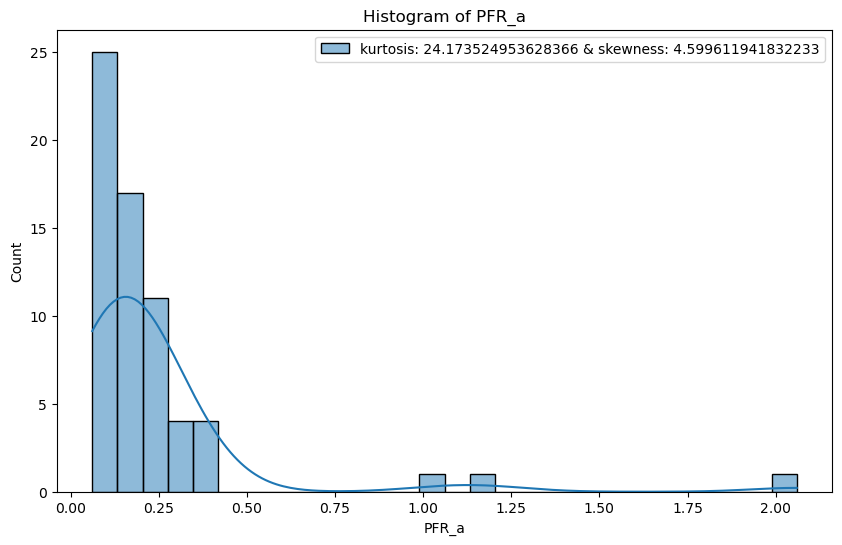

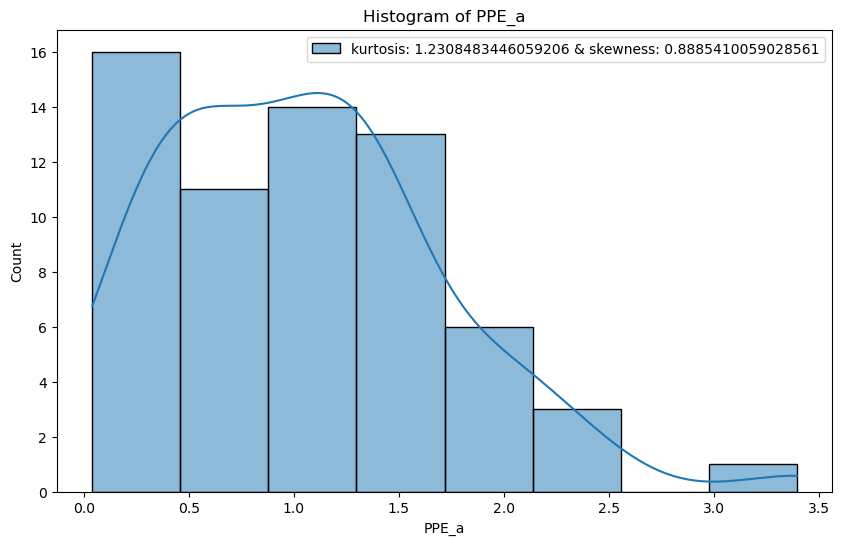

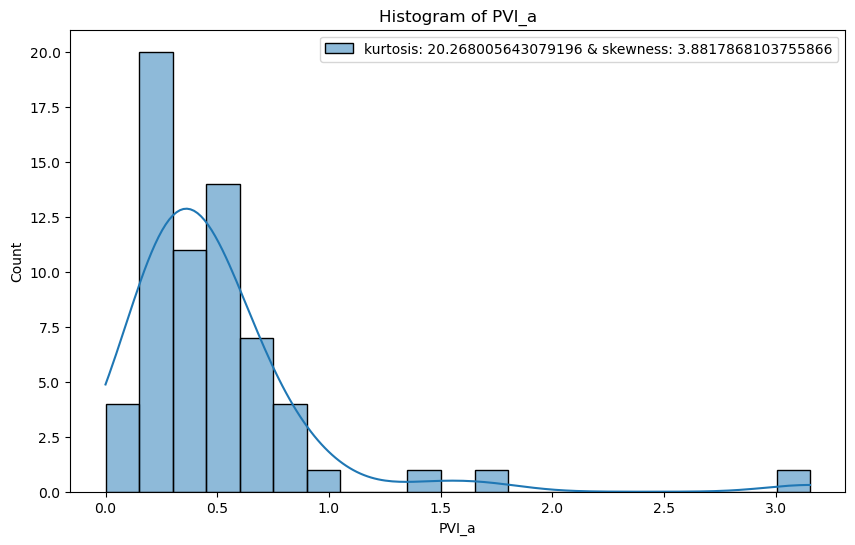

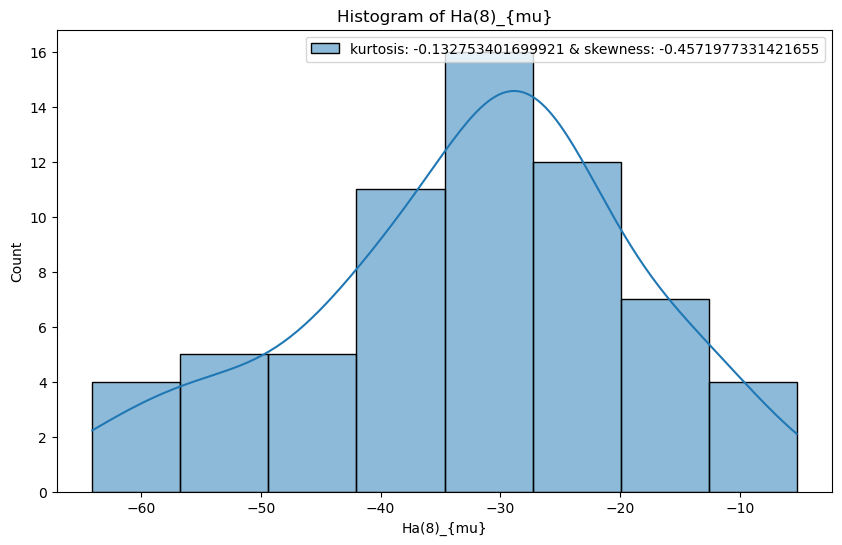

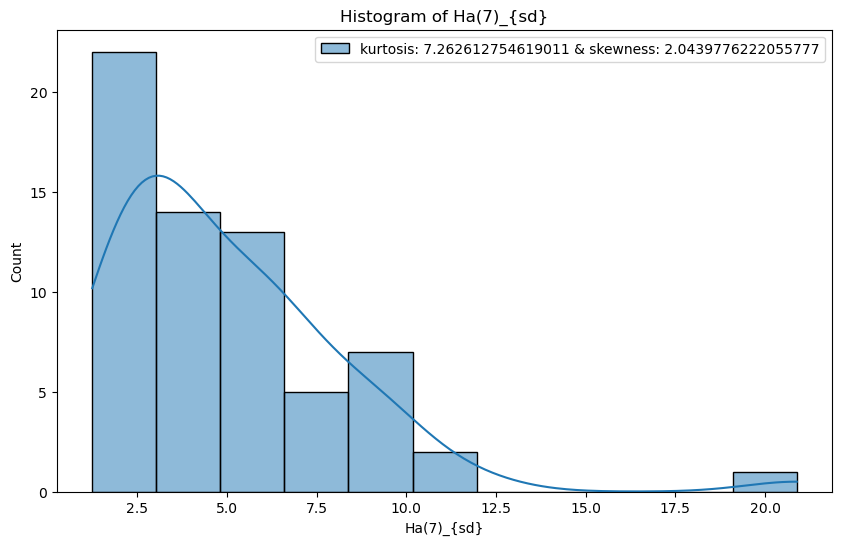

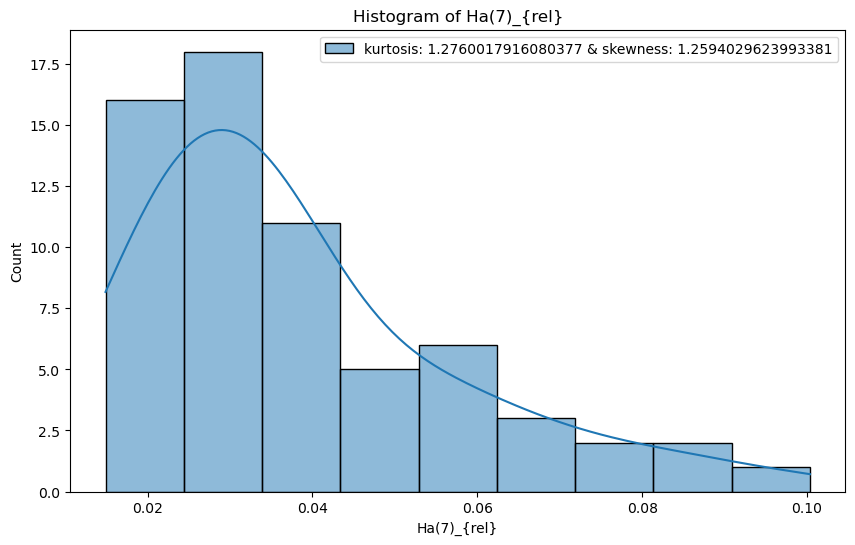

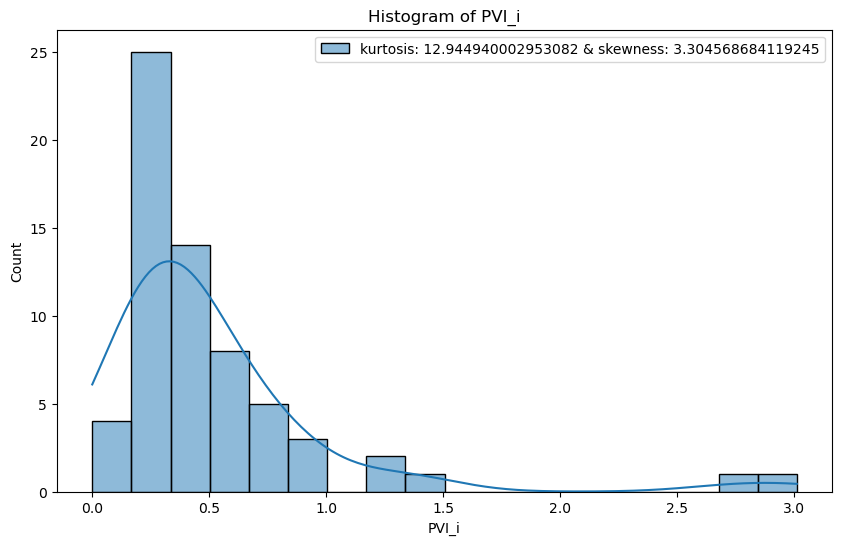

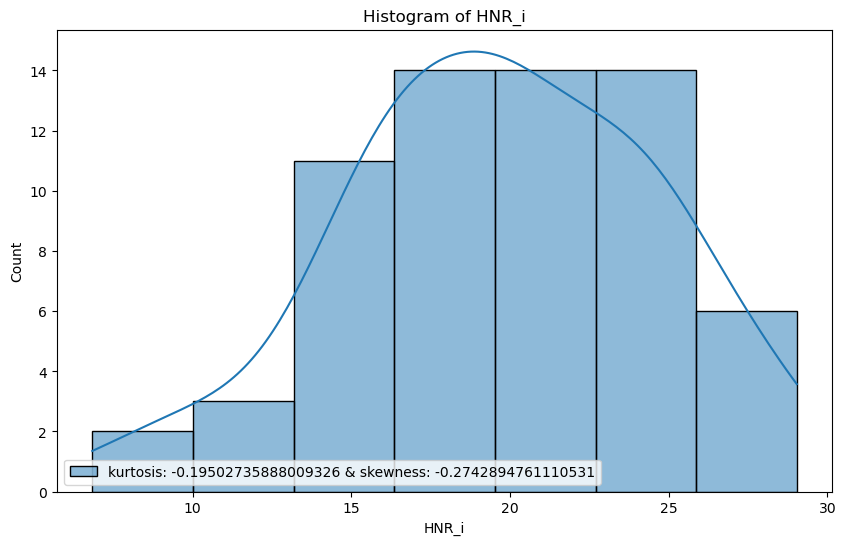

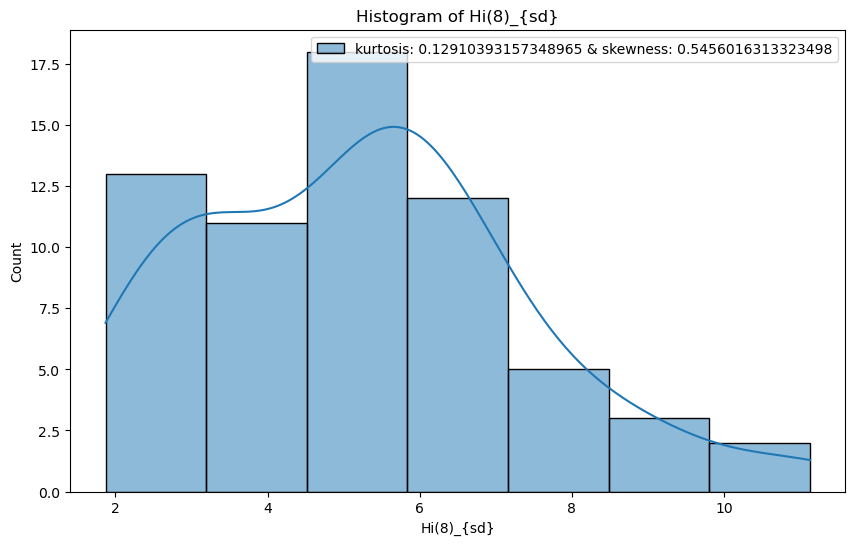

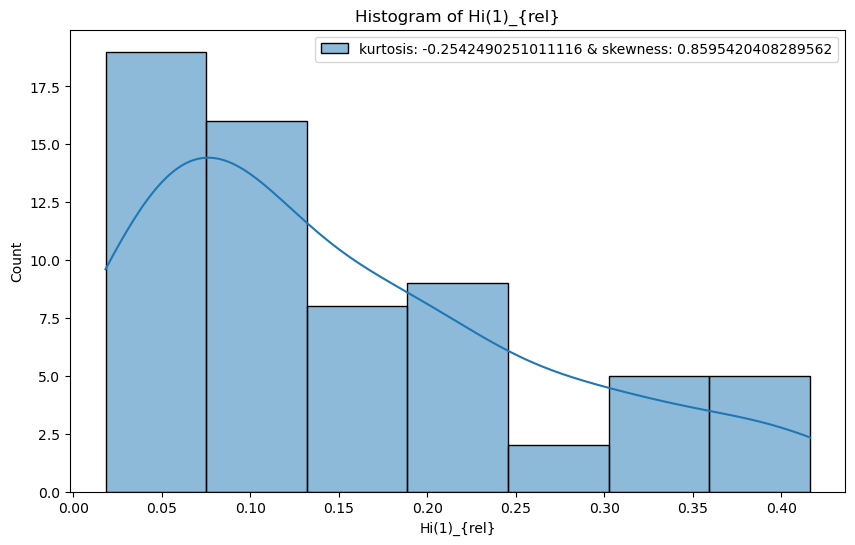

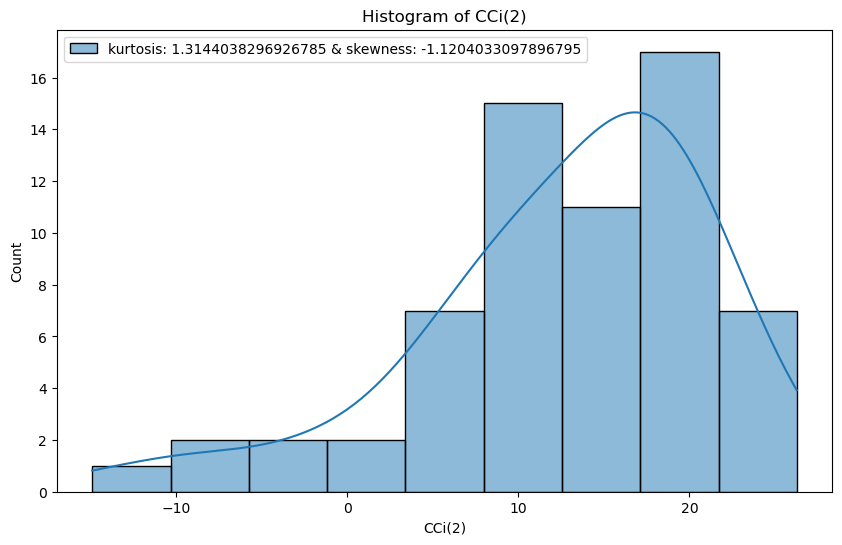

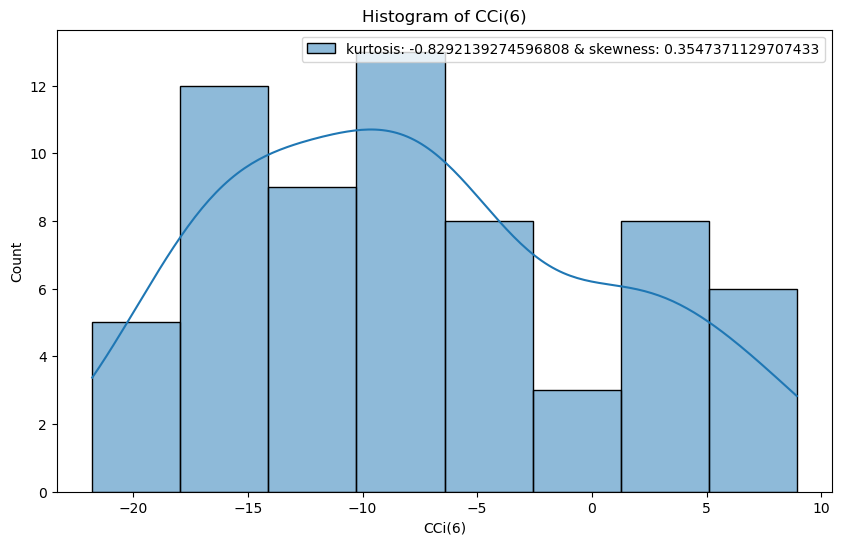

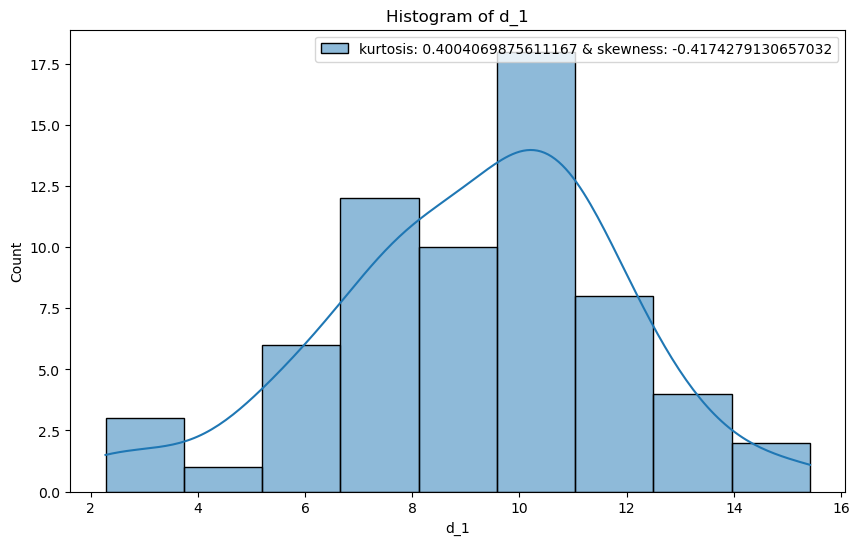

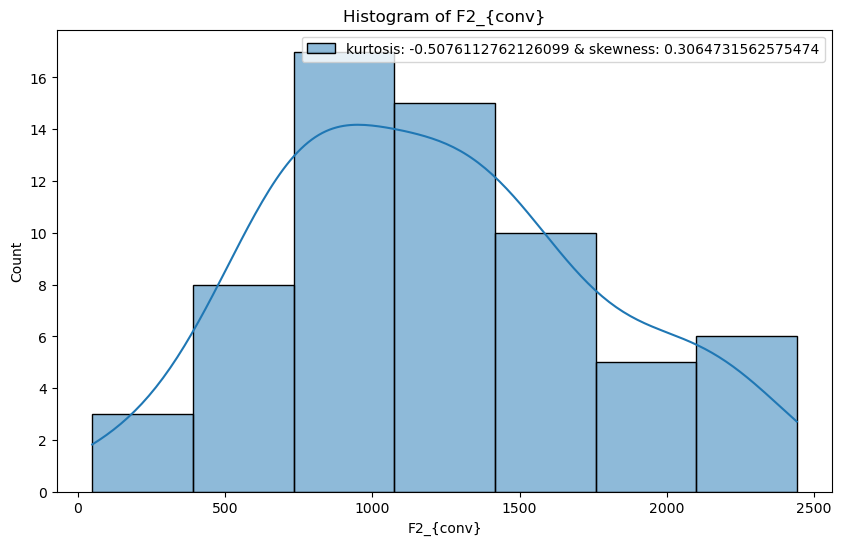

In [38]:
#see the histogramplots column wise
for column in x:
    plt.figure(figsize=(10, 6))
    k = df[column].kurt() #kurtosis
    s = df[column].skew() #Skewness
    sns.histplot(df[column], kde=True, label= f'kurtosis: {k} & skewness: {s}')
    plt.title(f'Histogram of {column}')
    plt.legend()
    plt.show()



The code creates a histogram for each column in a Pandas DataFrame `x` using the `seaborn` library. The code:

* Iterates over each column in the DataFrame
* Calculates kurtosis and skewness for each column
* Creates a histogram for each column with a KDE curve overlaid on top
* Sets the title of each plot to include the column name and kurtosis/skewness values

The resulting plots show the distribution of values in each column, including any outliers or anomalies.

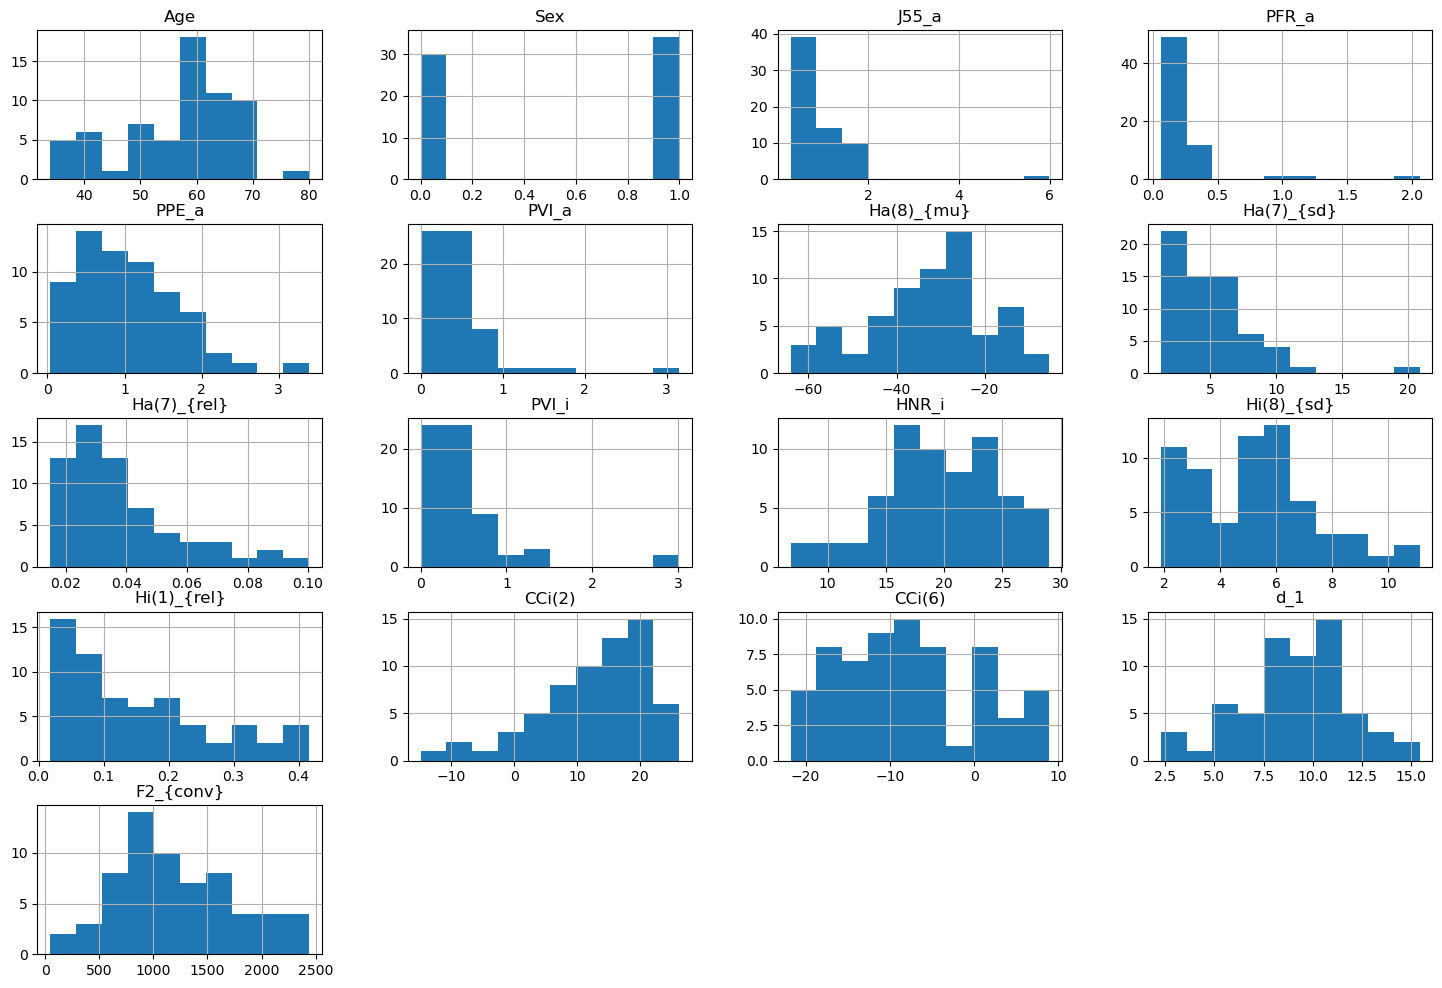

In [40]:
x.hist(figsize=(18,12)); # histogram of all columns

**Box plots**

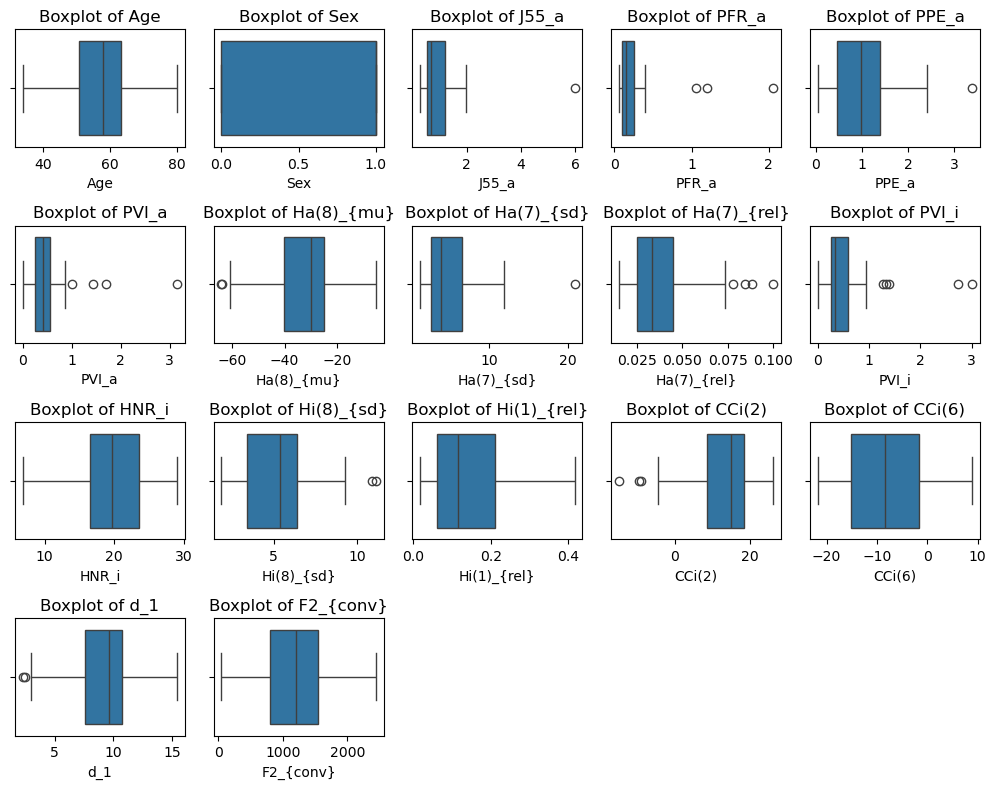

In [42]:
# boxplots for numerical columns with outliers
plt.figure(figsize=(10, 8))
for i,column in enumerate(x):
        plt.subplot(4,5,i+1)
        sns.boxplot(x=x[column])
        plt.title(f'Boxplot of {column}')
        
plt.tight_layout()
plt.show()

1. Iterate over each column in the DataFrame using `enumerate`.
2. Create a box plot for each column using `sns.boxplot`.
3. Set the title of each plot to the column name.

**Resulting Plot**

* 20 subplots (4 rows x 5 columns) each showing a box plot for a different column.
* Each subplot title is the name of the corresponding column.

**Useful for**

* Exploring and understanding the distribution of values in each column.
* Identifying outliers or anomalies in the data.

<Axes: >

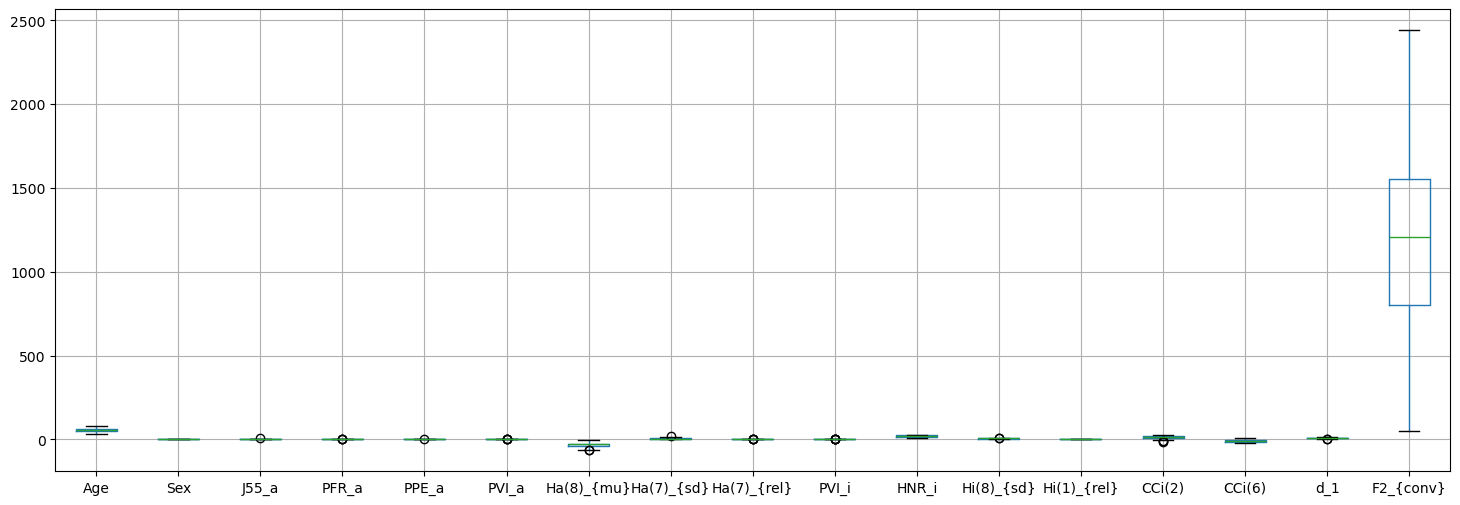

In [44]:
##boxplot of all columns
x.boxplot(figsize=(18,6))

In [45]:
# create the dictionaries for statistics
mean = {}
std = {}
max = {}
min = {}
var = {}
mode = {}


# Calculate statistics for each column
for i in x.columns:
    mean[i] = x[i].mean()
    std[i] = x[i].std()
    max[i] =  x[i].max()
    min[i] = x[i].min()
    var[i] = x[i].var()
    mode[i] = x[i].mode()
    
    
# printing statistis for each column using with For loop  
    print(f"Column: {i}")
    print(f"Mean: {mean[i]}")
    print(f"Standard Deviation: {std[i]}")
    print(f"Max: {max[i]}")
    print(f"Min: {min[i]}")
    print(f"Var: {var[i]}")
    print(f"Mode: {mode[i]}")
    print('-----'*10)

Column: Age
Mean: 56.390625
Standard Deviation: 10.203667544035643
Max: 80
Min: 34
Var: 104.11483134920636
Mode: 0    60
Name: Age, dtype: int64
--------------------------------------------------
Column: Sex
Mean: 0.53125
Standard Deviation: 0.5029673851018478
Max: 1
Min: 0
Var: 0.25297619047619047
Mode: 0    1
Name: Sex, dtype: int64
--------------------------------------------------
Column: J55_a
Mean: 0.9454963659113814
Standard Deviation: 0.7915578601815897
Max: 5.99133551977937
Min: 0.285496902227754
Var: 0.6265638460152572
Mode: 0     0.285497
1     0.304952
2     0.347673
3     0.363699
4     0.378197
        ...   
59    1.821009
60    1.889785
61    1.951256
62    1.965493
63    5.991336
Name: J55_a, Length: 64, dtype: float64
--------------------------------------------------
Column: PFR_a
Mean: 0.22950795241187177
Standard Deviation: 0.2994210517717801
Max: 2.05988326586503
Min: 0.0614092277753447
Var: 0.08965296624411902
Mode: 0     0.061409
1     0.063347
2     0.063731
3 

In [46]:
num_col = x.select_dtypes(include='number').columns # create the numric columns
num_col= x[num_col].corr() 


#check the correletion numric column
num_col.head(50)

Age       Sex     J55_a     PFR_a     PPE_a     PVI_a  \
Age          1.000000  0.026966  0.184253  0.136052  0.049242  0.154727   
Sex          0.026966  1.000000 -0.214536 -0.163947 -0.232222 -0.220055   
J55_a        0.184253 -0.214536  1.000000  0.817227  0.763242  0.861297   
PFR_a        0.136052 -0.163947  0.817227  1.000000  0.456137  0.686740   
PPE_a        0.049242 -0.232222  0.763242  0.456137  1.000000  0.737692   
PVI_a        0.154727 -0.220055  0.861297  0.686740  0.737692  1.000000   
Ha(8)_{mu}  -0.104500 -0.287087 -0.179818 -0.209699 -0.127952 -0.145881   
Ha(7)_{sd}   0.186713 -0.013304  0.669413  0.651039  0.551722  0.606170   
Ha(7)_{rel} -0.197313 -0.133471 -0.195084 -0.237686 -0.174568 -0.173399   
PVI_i       -0.001773  0.096510  0.245381  0.011550  0.541317  0.316831   
HNR_i       -0.291332  0.308280 -0.452905 -0.283053 -0.496916 -0.457349   
Hi(8)_{sd}   0.158820  0.129129  0.208691  0.137311  0.320599  0.196170   
Hi(1)_{rel} -0.229568  0.235512 -0.289631 -0.244529 -0.372266 -0.257760   
CCi(2)      -0.399001 -0.174748 -0.224258 -0.403757  0.000599 -0.207569   
CCi(6)       0.120964 -0.257726  0.388139  0.381911  0.429114  0.449964   
d_1         -0.241235  0.167690 -0.211375 -0.285186 -0.189690 -0.261770   
F2_{conv}   -0.341549  0.306281 -0.209832 -0.331199 -0.068347 -0.209879   

             Ha(8)_{mu}  Ha(7)_{sd}  Ha(7)_{rel}     PVI_i     HNR_i  \
Age           -0.104500    0.186713    -0.197313 -0.001773 -0.291332   
Sex           -0.287087   -0.013304    -0.133471  0.096510  0.308280   
J55_a         -0.179818    0.669413    -0.195084  0.245381 -0.452905   
PFR_a         -0.209699    0.651039    -0.237686  0.011550 -0.283053   
PPE_a         -0.127952    0.551722    -0.174568  0.541317 -0.496916   
PVI_a         -0.145881    0.606170    -0.173399  0.316831 -0.457349   
Ha(8)_{mu}     1.000000   -0.453556     0.712990 -0.084679 -0.112767   
Ha(7)_{sd}    -0.453556    1.000000    -0.532977  0.204290 -0.260853   
Ha(7)_{rel}    0.712990   -0.532977     1.000000 -0.140939  0.098513   
PVI_i         -0.084679    0.204290    -0.140939  1.000000 -0.347194   
HNR_i         -0.112767   -0.260853     0.098513 -0.347194  1.000000   
Hi(8)_{sd}    -0.485238    0.396057    -0.477790  0.298143 -0.185386   
Hi(1)_{rel}    0.023020   -0.301603     0.123904 -0.290207  0.599915   
CCi(2)         0.398305   -0.383573     0.398123 -0.022991  0.238966   
CCi(6)         0.133397    0.223843    -0.059114  0.057376 -0.389983   
d_1            0.138015   -0.284878     0.359289 -0.125869  0.345107   
F2_{conv}      0.093605   -0.199028     0.285354  0.029502  0.294596   

             Hi(8)_{sd}  Hi(1)_{rel}    CCi(2)    CCi(6)       d_1  F2_{conv}  
Age            0.158820    -0.229568 -0.399001  0.120964 -0.241235  -0.341549  
Sex            0.129129     0.235512 -0.174748 -0.257726  0.167690   0.306281  
J55_a          0.208691    -0.289631 -0.224258  0.388139 -0.211375  -0.209832  
PFR_a          0.137311    -0.244529 -0.403757  0.381911 -0.285186  -0.331199  
PPE_a          0.320599    -0.372266  0.000599  0.429114 -0.189690  -0.068347  
PVI_a          0.196170    -0.257760 -0.207569  0.449964 -0.261770  -0.209879  
Ha(8)_{mu}    -0.485238     0.023020  0.398305  0.133397  0.138015   0.093605  
Ha(7)_{sd}     0.396057    -0.301603 -0.383573  0.223843 -0.284878  -0.199028  
Ha(7)_{rel}   -0.477790     0.123904  0.398123 -0.059114  0.359289   0.285354  
PVI_i          0.298143    -0.290207 -0.022991  0.057376 -0.125869   0.029502  
HNR_i         -0.185386     0.599915  0.238966 -0.389983  0.345107   0.294596  
Hi(8)_{sd}     1.000000    -0.208470 -0.240840  0.097976 -0.261030  -0.048364  
Hi(1)_{rel}   -0.208470     1.000000  0.269096 -0.109771  0.069119   0.281251  
CCi(2)        -0.240840     0.269096  1.000000 -0.197918  0.541387   0.564874  
CCi(6)         0.097976    -0.109771 -0.197918  1.000000 -0.559611  -0.372608  
d_1           -0.261030     0.069119  0.541387 -0.559611  1.000000   0.498940  
F2_{conv} 

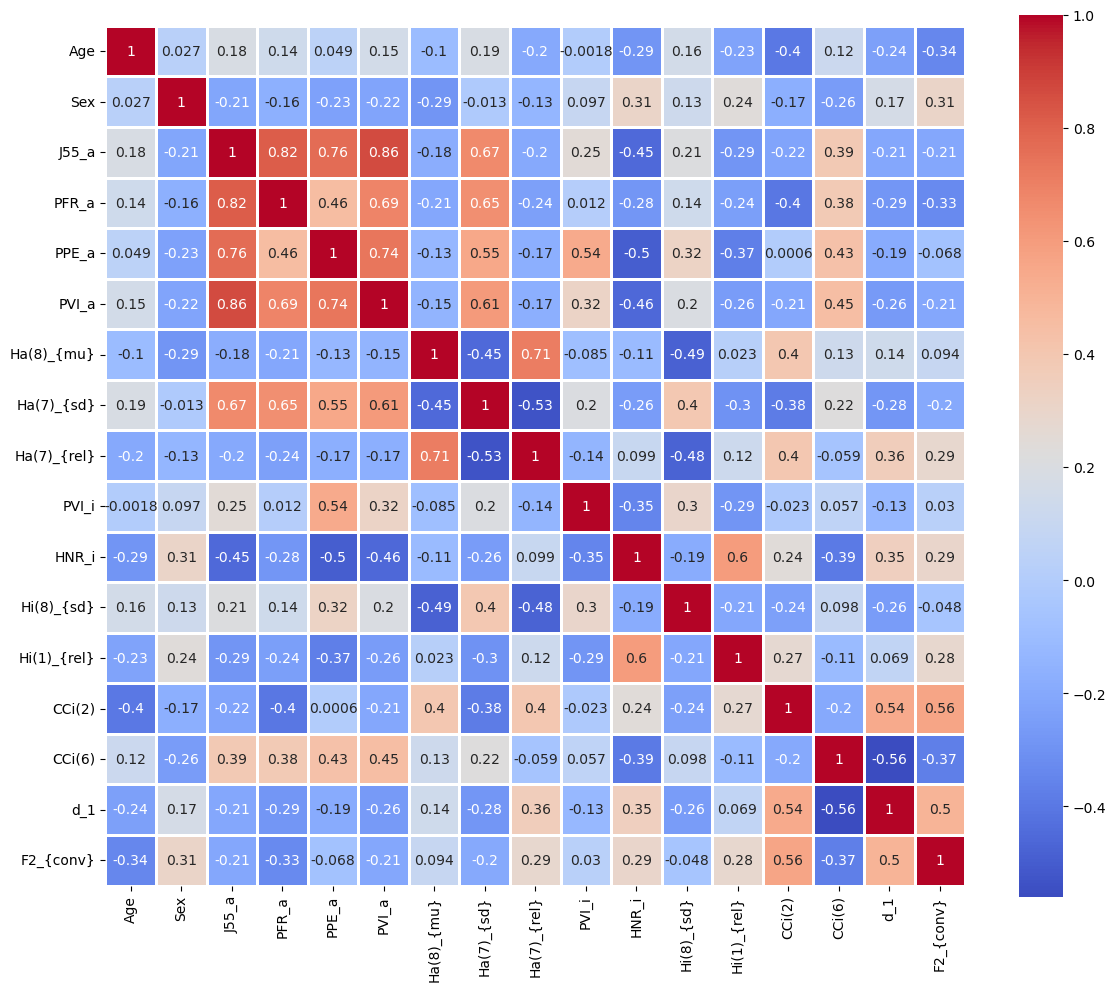

In [47]:
plt.figure (figsize=(12,10))
sns.heatmap(data=num_col,annot=True,fmt='.2g',linewidths=1,cmap='coolwarm', square=True) 
plt.tight_layout()


<Figure size 1800x1800 with 0 Axes>

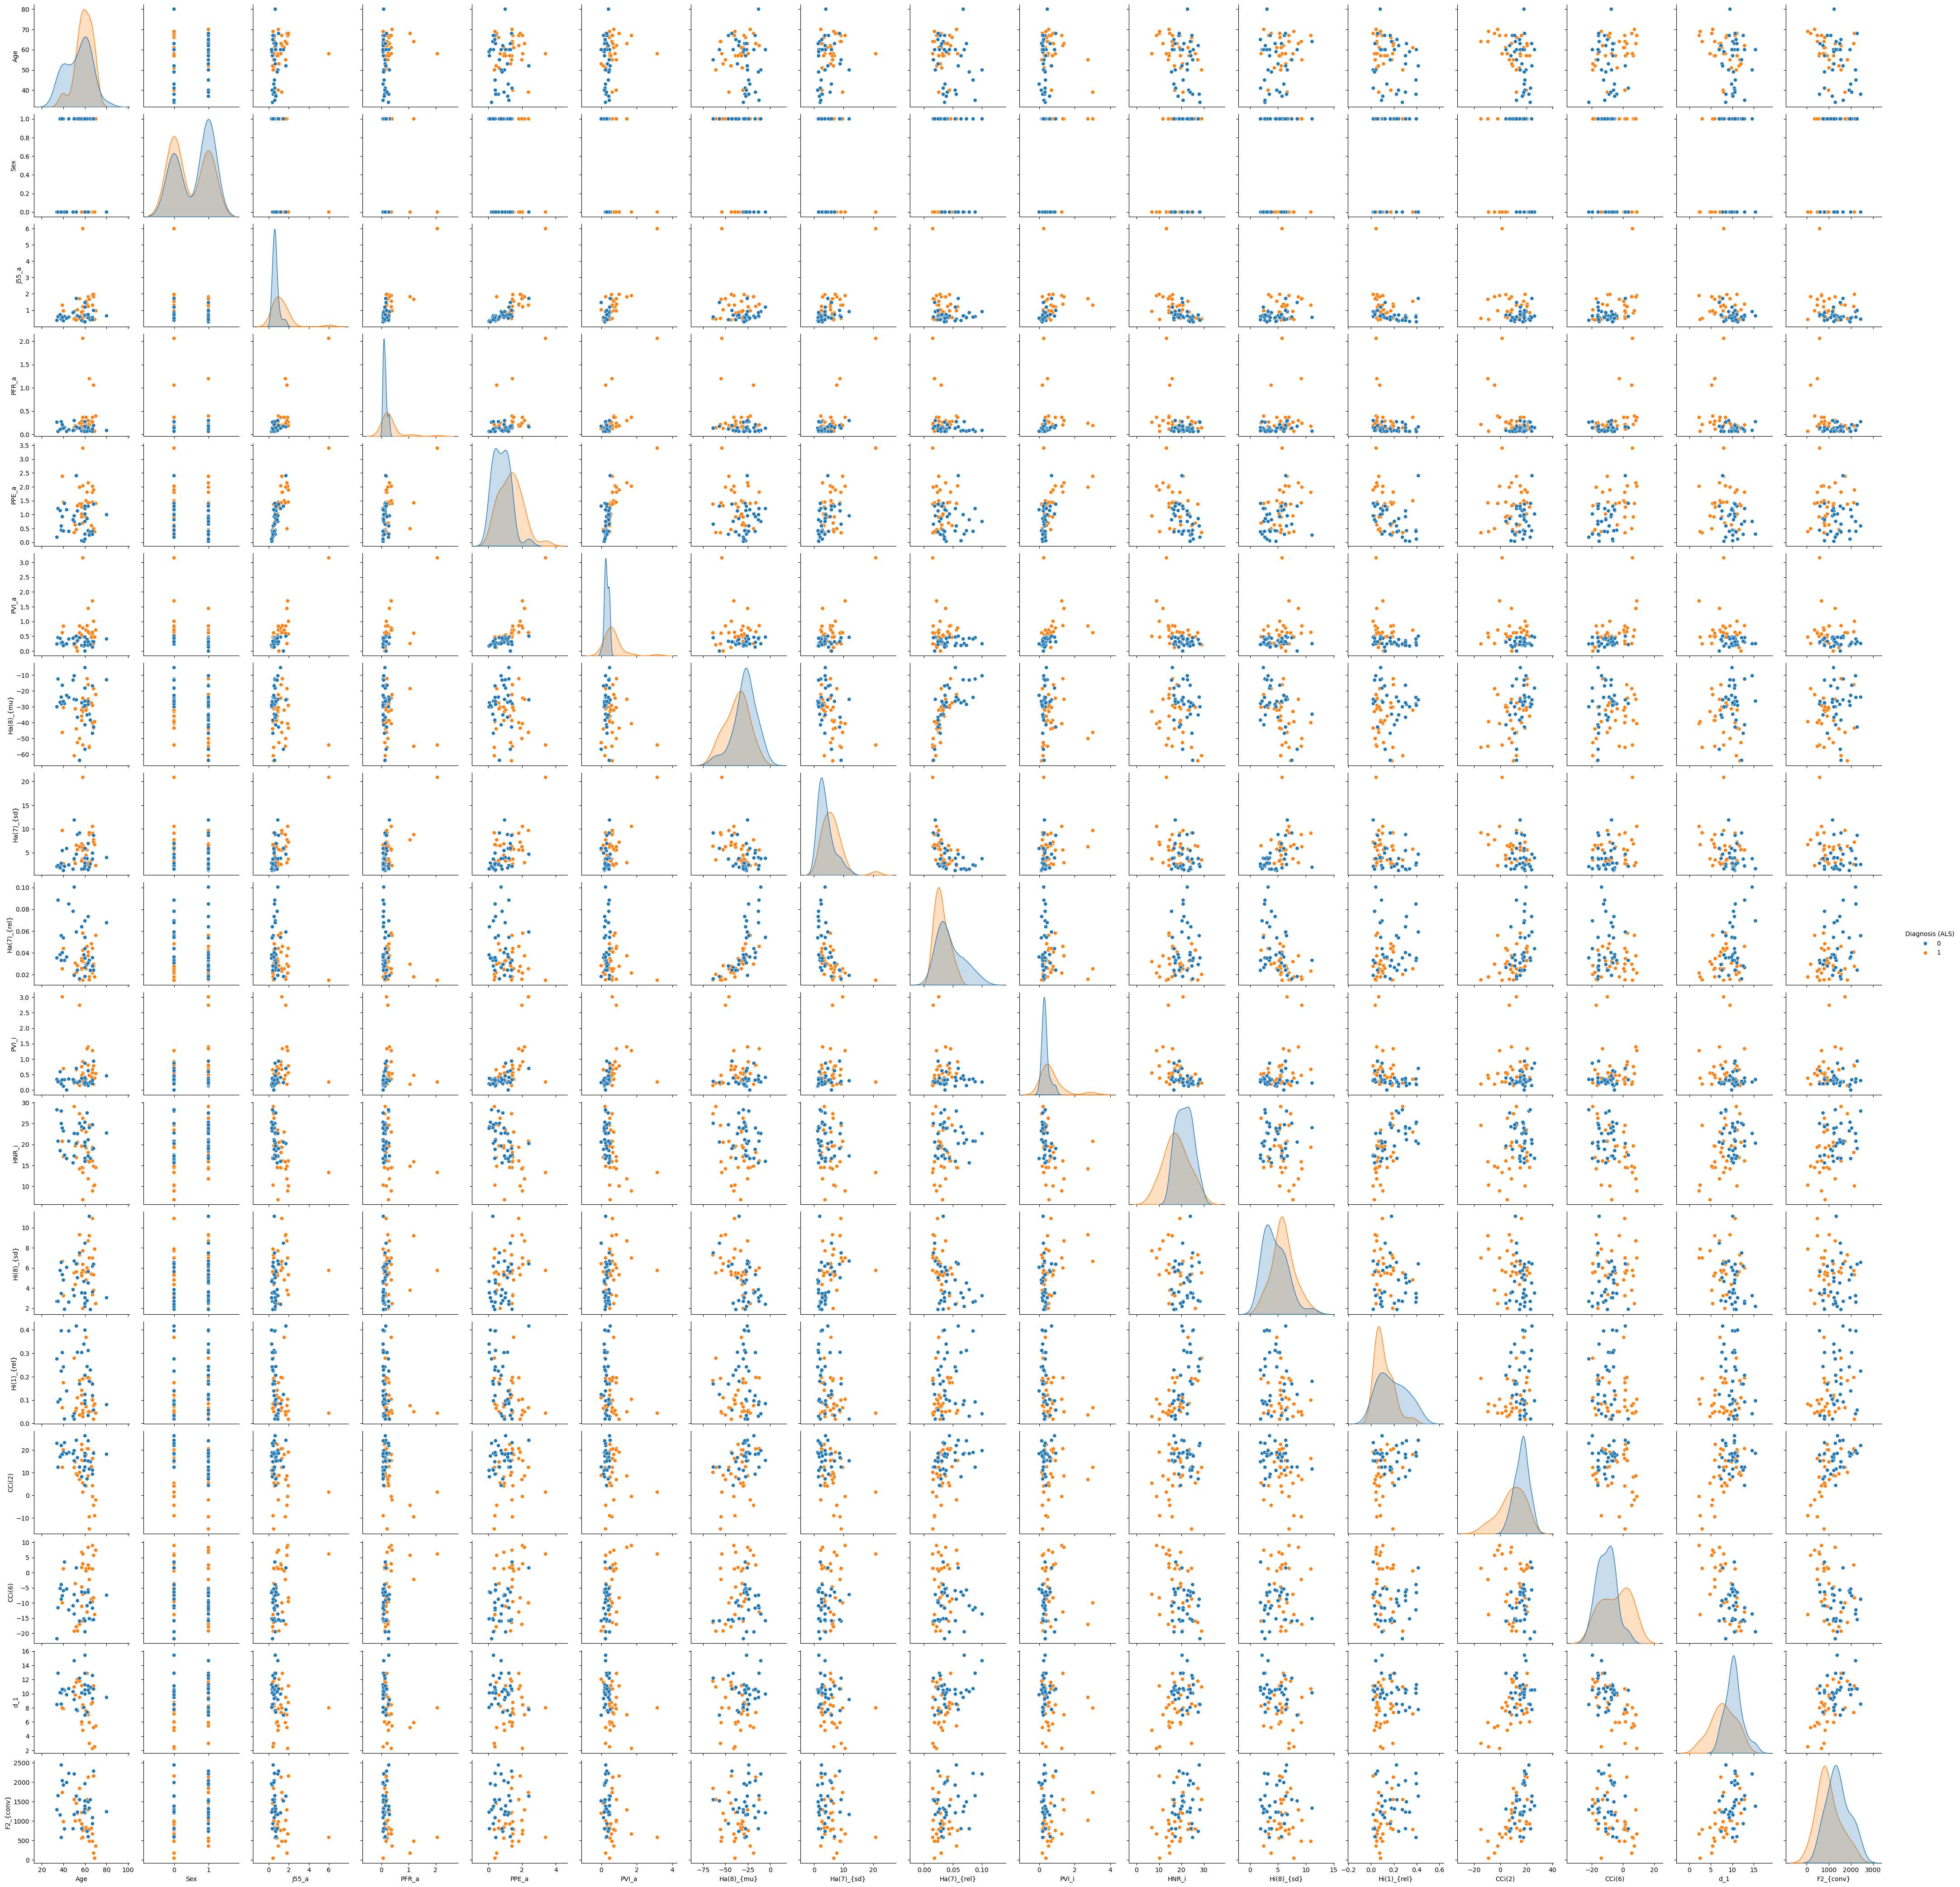

In [48]:
plt.figure(figsize=(18,18))
imp_col = df[['Age', 'Sex', 'J55_a', 'PFR_a', 'PPE_a', 'PVI_a', 'Ha(8)_{mu}', 'Ha(7)_{sd}','Ha(7)_{rel}', 'PVI_i', 'HNR_i', 'Hi(8)_{sd}', 'Hi(1)_{rel}','CCi(2)', 'CCi(6)', 'd_1', 'F2_{conv}','Diagnosis (ALS)']]
sns.pairplot(data=imp_col,hue='Diagnosis (ALS)')
plt.show()

**Models buldings using for loop**

In [50]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=12,stratify=y)

**Splitting a Dataset**

* The code uses `train_test_split` from scikit-learn to split a dataset into training and testing sets.
* The arguments are:
	+ `x` and `y`: input features and target variables, respectively.
	+ `test_size=0.2`: 20% of data for testing, 80% for training.
	+ `random_state=12`: ensures reproducibility of the split.
	+ `stratify=y`: ensures class proportions in training and testing sets match the original dataset.
* The function returns four arrays:
	+ `x_train`: training features (80%).
	+ `x_test`: testing features (20%).
	+ `y_train`: training target variable.
	+ `y_test`: testing target variable.
* This process allows evaluation of model performance on unseen data and avoids overfitting.

In [52]:
#create the variable use of model bulding
model = [
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    BaggingClassifier(),
    AdaBoostClassifier(),
    LogisticRegression(),
    SVC(),
    KNeighborsClassifier(),
    GaussianNB()
]

**KFOLD**

In [54]:
for i in model:
    kfold = KFold(8)
    score = cross_val_score(estimator=i,X=x,y=y,cv=kfold)
    print(i)
    print(f'score:',score)
    print(f'mean_value:',score.mean())
    print(f'min_value:',score.min())
    print('------'*10)

DecisionTreeClassifier()
score: [0.625 0.875 0.75  0.625 0.5   0.625 1.    0.875]
mean_value: 0.734375
min_value: 0.5
------------------------------------------------------------
RandomForestClassifier()
score: [0.5   0.75  1.    0.625 1.    0.5   1.    0.625]
mean_value: 0.75
min_value: 0.5
------------------------------------------------------------
GradientBoostingClassifier()
score: [0.625 0.875 0.5   0.625 0.375 0.625 1.    0.75 ]
mean_value: 0.671875
min_value: 0.375
------------------------------------------------------------
BaggingClassifier()
score: [0.625 0.75  0.875 0.625 0.625 0.625 1.    0.625]
mean_value: 0.71875
min_value: 0.625
------------------------------------------------------------
AdaBoostClassifier()
score: [0.625 0.875 0.75  0.75  0.5   0.75  1.    0.375]
mean_value: 0.703125
min_value: 0.375
------------------------------------------------------------
LogisticRegression()
score: [0.625 0.75  0.5   0.25  1.    0.5   0.875 0.375]
mean_value: 0.609375
min_value:

# 
* Kfold not good for this models 
* Kfold result vary poor and bad score given this data set

**STRATIFIEDKFOLD**

In [57]:
for i in model:
    skf= StratifiedKFold(5)
    score2 = cross_val_score(estimator=i,X=x,y=y,cv=skf)
    print(i)
    print(f'score:',score2)
    print(f'mean_value:',score2.mean())
    print(f'min_value:',score2.min())
    print('------'*10)

DecisionTreeClassifier()
score: [0.61538462 0.61538462 0.84615385 0.92307692 0.66666667]
mean_value: 0.7333333333333333
min_value: 0.6153846153846154
------------------------------------------------------------
RandomForestClassifier()
score: [0.76923077 0.61538462 0.92307692 1.         0.75      ]
mean_value: 0.8115384615384615
min_value: 0.6153846153846154
------------------------------------------------------------
GradientBoostingClassifier()
score: [0.76923077 0.61538462 0.92307692 1.         0.83333333]
mean_value: 0.8282051282051281
min_value: 0.6153846153846154
------------------------------------------------------------
BaggingClassifier()
score: [0.69230769 0.61538462 0.84615385 1.         0.91666667]
mean_value: 0.8141025641025641
min_value: 0.6153846153846154
------------------------------------------------------------
AdaBoostClassifier()
score: [0.69230769 0.76923077 0.84615385 0.76923077 0.66666667]
mean_value: 0.7487179487179487
min_value: 0.6666666666666666
-----------


* StratifildKfold also not good this models 

* But 5 models min beter in this movment there are


* DecisionTreeClassifier mean value :0.75
* RandomForestClassifier mean value: 0.79
* GradientBoostingClassifier mean value :0.81
* BaggingClassifier mean value :0.78
* AdaBoostClassifier mean value :0.74

**LeaveOneOut**

In [60]:
LOO = LeaveOneOut()
for i  in  model:
    score3 = cross_val_score(estimator=i ,X=x,y=y,cv=LOO)
    print(i)
    print(f'score:',score3)
    print(f'mean_value:',score3.mean())
    print('------'*10)

DecisionTreeClassifier()
score: [1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0.]
mean_value: 0.703125
------------------------------------------------------------
RandomForestClassifier()
score: [1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0.]
mean_value: 0.796875
------------------------------------------------------------
GradientBoostingClassifier()
score: [1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
mean_value: 0.828125
------------------------------------------------------------
BaggingClassifier()
score: [1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0.

# 
* Leave One Out also good this models 
* But 4 models are beter in this movment, there are
* RandomForestClassifier mean value is :0.81
* GradientBoostingClassifier mean value :0.81
* BaggingClassifier mean value :0.84
* AdaBoostClassifier mean value :0.81

**ShuffleSplit**

In [63]:
ssp  = ShuffleSplit(n_splits=6,test_size=0.2)
for i in model:
    score4 =cross_val_score(estimator=i,X=x,y=y,cv=ssp)
    print(i)
    print(f'score:',score4)
    print(f'mean_value:',score4.mean())
    print(f'min_value:',score4.min())
    print('------'*10)

DecisionTreeClassifier()
score: [0.84615385 0.76923077 0.84615385 0.76923077 0.61538462 0.76923077]
mean_value: 0.7692307692307693
min_value: 0.6153846153846154
------------------------------------------------------------
RandomForestClassifier()
score: [0.76923077 0.76923077 0.84615385 0.84615385 0.84615385 0.92307692]
mean_value: 0.8333333333333334
min_value: 0.7692307692307693
------------------------------------------------------------
GradientBoostingClassifier()
score: [0.61538462 0.69230769 0.76923077 0.61538462 0.84615385 0.84615385]
mean_value: 0.7307692307692308
min_value: 0.6153846153846154
------------------------------------------------------------
BaggingClassifier()
score: [0.76923077 0.76923077 0.92307692 0.92307692 0.69230769 0.84615385]
mean_value: 0.8205128205128206
min_value: 0.6923076923076923
------------------------------------------------------------
AdaBoostClassifier()
score: [0.84615385 0.92307692 0.84615385 0.84615385 0.76923077 0.84615385]
mean_value: 0.846

# 
* StratifildKfold also good this models 
* But 3 models min beter in this movment there are
* RandomForestClassifier mean value :0.84
* GradientBoostingClassifier mean value :0.76
* BaggingClassifier mean value :0.78

In [65]:
#create the variable use of model bulding for hyper paramitor tuning
models = [
    
    ('DecisionTreeClassifier',DecisionTreeClassifier()),
    ('RandomForestClassifier', RandomForestClassifier()),
    ('GradientBoostingClassifier', GradientBoostingClassifier()),
    ('BaggingClassifier',BaggingClassifier()),
    ('AdaBoostClassifier',AdaBoostClassifier()),
    ('LogisticRegression',LogisticRegression()),
    ('SVC',SVC()),
    ('KNeighborsClassifier',KNeighborsClassifier()),
    ('GaussianNB',GaussianNB())
]

In [66]:
#create a paramitore grids for GridSearchCV
para_grids= {
    'DecisionTreeClassifier':{
        'criterion':['gini','entropy','log_loss'],
        'splitter':['best','random'],
        'max_depth':[6,8,10,12],
        'min_samples_split':[2,3,4,5,6]
    },
    'RandomForestClassifier':{
       'n_estimators':[10,40,50,60,70,100],
        'criterion':['gini','entropy','log_loss'],
        'max_depth':[6,8,10,12],
        'min_samples_split':[2,3,4,5,6]
    },
    'GradientBoostingClassifier':{
        'n_estimators':[10,40,50,60,70,100],
        'min_samples_split':[2,3,4,5,6]
    },
    'BaggingClassifier':{
        'n_estimators':[10,40,50,60,70,100],
        'max_samples':[6,8,10,12]
    },
    'AdaBoostClassifier':{
        'n_estimators':[10,40,50,60,70,100]
    },
    'LogisticRegression':{
    },
    'SVC':{
    },
    'KNeighborsClassifier':{
        'n_neighbors':[2,3,4,5],
        'weights':['distance','uniform'],
        'algorithm':['ball_tree','kd_tree','brute'],
        'p':[2,3,4,5,6]
    },
    'GaussianNB':{}
}

**GridSearchCV**

In [68]:
for model_name,model_instance in models:
    
    Gscv = GridSearchCV(estimator=model_instance,param_grid=para_grids[model_name],cv=5,n_jobs=-1)
    
    # Fit the model
    Gscv.fit(x_train,y_train)
    
    
    # Make predictions
    pred = Gscv.predict(x_test)
    
    # Print classification report
    # Get the best estimator
    print(Gscv.best_estimator_)
    print(Gscv.best_score_)
    print('------'*10)
    

DecisionTreeClassifier(criterion='entropy', max_depth=10, splitter='random')
0.8836363636363636
------------------------------------------------------------
RandomForestClassifier(max_depth=6, n_estimators=40)
0.8636363636363636
------------------------------------------------------------
GradientBoostingClassifier(n_estimators=10)
0.7836363636363636
------------------------------------------------------------
BaggingClassifier(max_samples=12, n_estimators=60)
0.8036363636363635
------------------------------------------------------------
AdaBoostClassifier()
0.7854545454545454
------------------------------------------------------------
LogisticRegression()
0.630909090909091
------------------------------------------------------------
SVC()
0.6890909090909091
------------------------------------------------------------
KNeighborsClassifier(algorithm='ball_tree', p=3)
0.7054545454545453
------------------------------------------------------------
GaussianNB()
0.7836363636363636
-------

# 
* Based on the accuracy scores :
* 4 models are best model for this data set
* DecisionTreeClassifier accuracy is 0.84
* RandomForestClassifier accuracy is 0.86
* GradientBoostingClassifieraccuracy is 0.78
* BaggingClassifier accuracy is 0.80

**RandomizedSearchCV**

In [71]:
for model_name,model_instance in models:
    
    rscv = RandomizedSearchCV(estimator=model_instance,param_distributions=para_grids[model_name],cv=5,n_jobs=-1)
    
    # Fit the model
    rscv.fit(x_train,y_train)
    
    
    # Make predictions
    pred = rscv.predict(x_test)
    
   
    # Get the best estimator
    print(rscv.best_estimator_)
    #  get Print best_score
    print(rscv.best_score_)
    print('------'*10)
    

DecisionTreeClassifier(criterion='log_loss', max_depth=8)
0.8054545454545454
------------------------------------------------------------
RandomForestClassifier(criterion='entropy', max_depth=12, min_samples_split=4,
                       n_estimators=60)
0.8236363636363636
------------------------------------------------------------
GradientBoostingClassifier(n_estimators=10)
0.7836363636363636
------------------------------------------------------------
BaggingClassifier(max_samples=6, n_estimators=100)
0.8254545454545456
------------------------------------------------------------
AdaBoostClassifier()
0.7854545454545454
------------------------------------------------------------
LogisticRegression()
0.630909090909091
------------------------------------------------------------
SVC()
0.6890909090909091
------------------------------------------------------------
KNeighborsClassifier(algorithm='kd_tree', p=4)
0.7054545454545453
-------------------------------------------------------

# 
* Based on the accuracy scores and their f1 score :
* 5 models are best model for this data set
* DecisionTreeClassifier accuracy is 0.78
* AdaBoostClassifier accuracy is 0.78
* RandomForestClassifier accuracy is 0.82
* GradientBoostingClassifier accuracy is 0.78
* BaggingClassifier accuracy 0.78

**I am selecting the RandomForestClassifier model after checking the all model best score**

In [74]:
model =RandomForestClassifier(max_depth=6, min_samples_split=6, n_estimators=10)

**KFOLD**

In [76]:
kfold = KFold(6)
score = cross_val_score(estimator=model,X=x,y=y,n_jobs=-1,cv=6,verbose=0)

In [77]:
#kfold Scores
score

array([0.81818182, 0.90909091, 0.72727273, 0.90909091, 0.9       ,
       0.6       ])

In [78]:
# mean of the Score
score.mean()

0.8106060606060606

**StratifiedKFold**

In [80]:
SKF= StratifiedKFold(6)
score = cross_val_score(estimator=model,X=x,y=y,cv=6,n_jobs=-1,verbose=0)

In [81]:
score

array([0.72727273, 1.        , 0.63636364, 0.81818182, 0.9       ,
       0.7       ])

In [82]:
# mean of the Score
score.mean()

0.796969696969697

**LeaveOneOut**

In [84]:
LOO = LeaveOneOut()
score = cross_val_score(estimator=model,X=x,y=y,cv=LOO,verbose=0)

In [85]:
score

array([1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0.])

In [86]:
# mean of the Score
score.mean()

0.765625

**ShuffleSplit**

In [88]:
SFP= ShuffleSplit(n_splits=6,test_size=0.24)
score = cross_val_score(estimator=model,X=x,y=y,cv=SFP)

In [89]:
score

array([0.75  , 0.5625, 0.75  , 0.875 , 0.625 , 0.8125])

In [90]:
# mean of the Score
score.mean()

0.7291666666666666

**Neural Networks** 

In [92]:
model=tf.keras.Sequential([
    tf.keras.layers.Dense(17,input_shape=(x_train.shape[1],),activation='relu'),
    tf.keras.layers.Dense(8,activation='relu'), # hiden layers of Neural Networks
    tf.keras.layers.Dense(6,activation='relu'),  # hiden layers of Neural Networks
    tf.keras.layers.Dense(1,activation='sigmoid')
])

**Neural Network Model**

* Implemented using Keras in TensorFlow
* 4 layers:
	1. 17 neurons, ReLU activation, input shape `(batch_size, x_train.shape[1])`
	2. 8 neurons, ReLU activation
	3. 6 neurons, ReLU activation
	4. 1 neuron, sigmoid activation (binary classification)
* Architecture: input -> 17 neurons -> 8 neurons -> 6 neurons -> output
* Simple feedforward neural network with three hidden layers

In [94]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

**Compiling a Neural Network Model**

The code compiles a neural network model using Keras and TensorFlow. The model is configured with:

* Adam optimizer to update weights during training
* Binary cross-entropy loss function for binary classification problems
* Accuracy metric to evaluate model performance

In [96]:
hist = model.fit(x_train,y_train,epochs=20,batch_size=8,verbose=0)

In [97]:
hist_df = pd.DataFrame(hist.history) 

In [98]:
hist_df.head()

accuracy       loss
0  0.490196  25.900238
1  0.490196   6.817887
2  0.607843   3.752803
3  0.568627   3.550312
4  0.529412   1.501967

<Axes: >

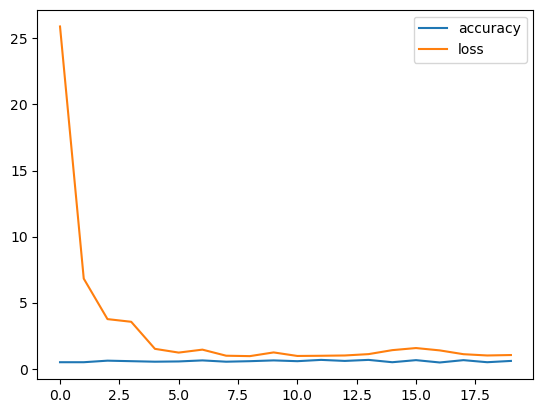

In [99]:
#ploting of the data history
hist_df.plot()

In [100]:
loss,accuracy = model.evaluate(x_test,y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step - accuracy: 0.5385 - loss: 0.7602


**Evaluating Neural Network Model Performance**

This code line evaluates a trained neural network model using the test dataset.

* `loss` stores the difference between predicted and actual output, measuring model performance.
* `accuracy` measures how often predictions match true labels.

`model.evaluate()` takes two inputs: `x_test` (input data) and `y_test` (true output).

The function returns two values: loss and accuracy, stored in `loss` and `accuracy` variables.

Example output: `loss:0.8549`, `accuracy: 0.6154` (model has an average loss of 0.8549 and accuracy of 61%).

In [102]:
accuracy

0.5384615659713745